# Lesson 4 - Differential Equations

Differential equations can model how different things interact with eachother. Many natural phenomena can be modelled by a set of differential equations.

A common example is how different species interact with each other, for instance, how predators and prey interact. Differential equations are encountered in sets. They depend on the results of their partner functions to compute their own values.

Consider:
$$
f'(t) = \frac{df(t)}{dt}
$$

We can write an equation, $g$, that depends both on the results of $f(t)$ and of $t$ itself:

$$
g(f(t), t)
$$

In this case, the function $g$ needs to take into account the current state of $f(t)$ but also on $t$ itself. For instance, to model the temperature change of an object in an environment, we have to take into account the amount of temperature in the object at some time point $t$, and that will have an effect on the rate of decay, $f(t)$ (the hotter, the faster the decay). These are differential equations.


## Numerical Integration
To talk about differential equations we have to start a bit earlier. Consider the derivative of a function $f$, which gives out the *growth rate* of $f$ at any point $x$:
$$
f'(t) = \frac{df(t)}{dt}
$$

The simplest derivative is $f'(x) = 0$. This function is a derivative of a function of the form $f(x) = c$, for any $c$. If we set a *boundary condition*, we can narrow down on which actual function was the original. E.g. if $f'(x) = 0$ and we know that $f(0) = 1$, then the infinite possibilities $f(x) = c$ have to narrow down to just $f(x) = 1$ to satisfy our condition.

Let's make it a bit harder. Consider $f'(x) = a$.
The possible integrals of this function are $f(x) = at + c$, and there are an infinite number of them.
If we know that $f(0) = 2.5$, then we know that $c = 2.5$ ($f(0) = 0 \cdot x + d = 2.5$).

Yet another example is $f'(x) = x$. The integral is $f(x) = \frac{x^2}{2} + c$. If $f(0) = 0.5$, then again it must be that $c = 0.5$.

#### Very complex functions

Assume the following function: $f'(x) = \frac{1}{2}$ with a boundary condition $f(0) = 2$. What if we don't know the real antiderivative, but still need to calculate the shape of $f(x)$?

We know that at $x = 0$, $f = 2$. We also know that at every point, $f(x)$ is growing at a rate of $\frac{1}{2}$. We can then calculate, after some space $\Delta$, that $f(x)$ is

$$
f(\Delta) = f'(0) \Delta + f(0)
$$

In this case, $2.5$. We can do the same at $2\Delta$, applying the same calculation. But now, instead of $f(0)$, we must use a previous approximation of $f(\Delta)$:

$$
f(2\Delta) = f'(\Delta) \Delta + f(\Delta)
$$

We can continue to do this on an on. This is called *numerical integration* of the derivative function. A generalized form is:

$$
f(i \Delta) = f'(i \Delta) \codt \Delta + f(i - 1 \Delta)
$$

This is called **Euler's linear approximation**. It starts from the boundary condition and then calculates the approximations over every $\Delta$ step.

Let's try with an harder function: $f'(x) = t$, with BC $f(0) = -1$. With $i = 1$ and $\Delta = 1$ then

$$
f(\Delta) + f'(0) \Delta + f(0) = -1
$$

This seems to be constant, but we know that it is not (the function grows with x). With larger $i$:
$$
f(2\Delta) = f'(\Delta)\Delta + f(\Delta) = 1 - 1 = 0 \\
f(3\Delta) = f'(2\Delta)\Delta + f(2\Delta) = 2 - 0 = 2 \\
\vdots
$$

The real antiderivative is $f(x) = \frac{t^2}{2} - 1$. Let's compare the approximation and the real function.
$f(0) = -1, -1$,
$f(1) = -1, -0.5$,
$f(2) = 0, 1$,
$f(3) = 2, 3.5$...

See how the actual derivative is constantly underestimated by the approximation? This is because the approximation of any point $f(i\Delta)$ depends on the previous value of $f((i-1)\cdot\Delta)$, so the error actually accumulates over time.

Let's see how to numerically integrate a function with Python.

In [1]:
import matplotlib.pylab as pl

In [2]:
## f'(t) = t, f(0) = -1

space = pl.linspace(0, 6, 7) # This makes space[1] - space[0] = 1

# Note that f'(x) = t, so f'(space) = space.
# Therefore, there is no need to implement f'(x)

delta = space[1] - space[0]

# let's make a container that will hold the values
# This is probably a bit useless but I'm following along
result = pl.zeros(len(space))

# We know that the entry at 0 is -1, since f(0) = -1
result[0] = -1

# We need to use a for loop, starting at i = 1 (i = 0 is known):
for i in range(1, len(result)):
    # We just need to implement Euler's approximation:
    result[i] = space[i] * delta + result[i-1]

print(result)

[-1.  0.  2.  5.  9. 14. 20.]


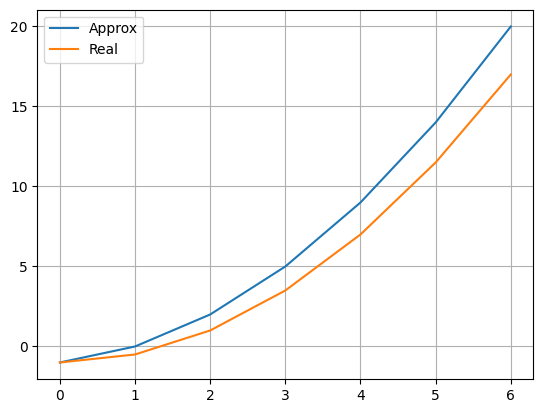

In [3]:
# We can plot the approximation and the real function

def fn(x):
    return ((x ** 2) / 2) - 1

pl.plot(space, result, label = "Approx")
pl.plot(space, fn(space), label = "Real")
pl.legend()
pl.grid()

As we increase the $\Delta$ more and more, the approximation gets better and better.

## Differential Equations

Let's imagine that there are two species in competition, like rabbits, that are prey but can multiply on their own (they eat grass), and wolves, that eat rabbits to multiply.

The number of rabbits, $x$, grows independently with the number of wolves, $y$. We can model the interaction in a simplified way:

$$
x \rightarrow_a 2x \\
x + y \rightarrow_b 2y \\
y \rightarrow_c 0
$$

The first reaction, $x \rightarrow_a 2x$, models how rabbits grow. The more rabbits there are (at "time" $x$), the more are generated (at "time" $2x$), at a *rate* $a$.\\
The second reaction, $x + y \rightarrow_b 2y$, models how wolves eat rabbits ($x + y$) to make a new wolf ($2y$, note how the $x$ disappeared, as the rabbit was eaten) at a rate $b$. Wolves also grow depending on how many rabbits there are, as they have more food to eat. If there are no more rabbits, the wolves die out, as they have nothing to eat.\\
The final reaction, $y \rightarrow_c 0$ shows that wolves die off over time of old age, at a rate of $c$. In this simplified model, and in reality, rabbits do not die of old age. All praise our rabbit overlords.

We can transform these "reactions" as a set of differential equations. One for the number of rabbits, and one for the number of wolves. Rabbits are modelled by:
$$
\frac{dx(t)}{dt} = ax(t) - bx(t)y(t)
$$
Meaning, rabbits grow (we are talking about a derivative) at a certain rate, $a$, depending on the number of rabbits at some point, $x(t)$, hence $a\cdot x(t)$. They are also, however, killed off by wolves, at a rate $b$ based on the number of rabbits ($x(t)$, the more rabbits the more likely they are found and killed by the wolves) and on the number of wolves ($y(t)$, the more wolves, the more chance they have to find a rabbit), hence $bx(t)y(t)$.

Wolves are modelled by:
$$
\frac{dy(t)}{dt} = bx(t)y(t) - cy(t)
$$
They grow at the rate that rabbits die (the second "reaction"), hence $bx(t)y(t)$. They also die of old age at a rate $c$, proportional of the number of wolves (the more wolves, the more old wolves, the more dead wolves of old age).

Assume that $a = c = 10, b = 20$ and the boundary conditions of $x(0) = 1$ and $y(0) = 1$.

These derivative equations are dependent on each other. Equations such as these are called *differential equations*.
We cannot get the antiderivatives of these function, but Python can help by solving them numerically.

In [4]:
# An implementation of what we need is is scipy.
# Their implementation has sophisticated ways to control for the
# errors introduced by using Euler's formula, and methods to
# quantify this error.
from scipy.integrate import odeint
# odeint = Ordinary Differential Equation INTegration

In [5]:
# This rabbits/wolves model was studied first by Lotka Volterra, and is
# called the Lotka-Volterra system.

# odeint needs a very specific function to model. It must take:
# - state: The state of the system, as a list of values. In our cases, [x(0), y(0)].
# - The timewe are interested in, t
# - The constants that the system requires. In our case, a, b and c
# It must return a list of the same length of the original state,
# with the updated state.
def lodka_volterra(state, t, a, b, c):
    # Note that we won't use the argument `t`, but it must be included
    # as it is needed by `odeint`
    
    # We unpack the state to two, more handy, variables
    xt, yt = state
    # This contains the values of x(t) and y(t)
    
    # We now needs to implement the change at the next time step,
    # based on the state:
    dx = a*xt - b * xt * yt # Change of rabbits
    dy = b*xt * yt - c * yt # Change of wolves
    
    # We now return the next state of the system
    return dx, dy

# Let's define that a = 10, b = 20 and c = 10.
# The starting conditions, state, will be [1, 1], as in [x, y],
# [rabbits, wolves].

Note that the number of rabbits and wolves `[1, 1]`, are not the *actual* number of rabbits and wolves. We *will* get states like `[1.934, 2.312]`, but we know that `.312` wolves are not possible. Imagine that this is a ratio of the number of wolves/rabbits in an area, like $1km^2$.

In [6]:
# Let's define some space of interest
# Note that this has NO effect on the delta selected by `odeint`.
# The delta is determined by the implementation of `odeint`, that is based
# on the precision that the algorithm needs, as well as the approximate error
# that it needs to achieve.

small_space = pl.linspace(0, 2, 5) # An arbitrary time space, like 2 years
# The unit of measure depends (or changes) the coefficients a, b and c

# let's run `odeint`:
small_result_1 = odeint(
    lodka_volterra, # The function that needs solving
    [1, 1], # The initial state
    small_space, # The space we are interested in
    args = ( # The extra arguments that our function needs
        # The order is based on the position, from left to right
        10, # a
        20, # b
        10  # c
    )
)

print(small_result_1) # A list of tuples!
print(small_space) # Just to see the time points

[[1.         1.        ]
 [0.59307546 0.13155947]
 [0.16291272 0.26409646]
 [0.21687919 1.03715306]
 [1.19483213 0.31234146]]
[0.  0.5 1.  1.5 2. ]


At time $0$, the rabbits are $1$ and wolves are $1$. At time $0.5$, we have $0.24$ and $0.42$ rabbits and wolves, respectively. This goes on and on.

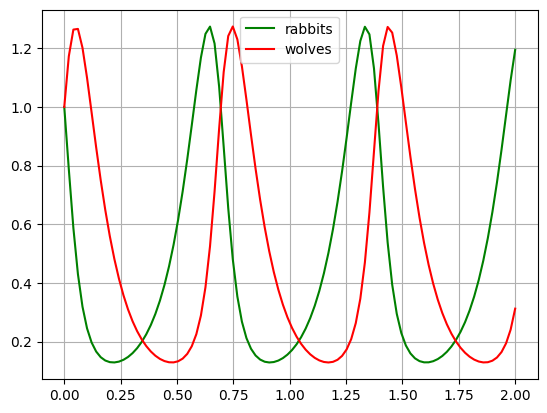

In [7]:
# Let's re-run it with a larger space
space = pl.linspace(0, 2, 100)
result_1 = odeint(lodka_volterra, [1, 1], space, args = (10, 20, 10))

# This is an array of arrays of length 2.
# We need to get just the first element for every sub-array to get the number of rabbits
# and the second element to get the number of wolves. It can be done easily through 
# numpy magic:
pl.plot(space, result_1[:,0], "g", label = "rabbits") # [:,0] > every row, first (0) column
pl.plot(space, result_1[:,1], "r", label = "wolves")
pl.legend()
pl.grid()

The system oscillates (it was designed to do so, but anyway)! As the number of rabbits grow, the wolves eat them, and grow. However, as they grow, they eat up all rabbits, and start to die off. As the wolves die, the rabbits can multiply again, and the cycle repeats.

The cycle repeats over and over again, forever. It can be shown that this system is oscillating, forever, in a stable pattern.

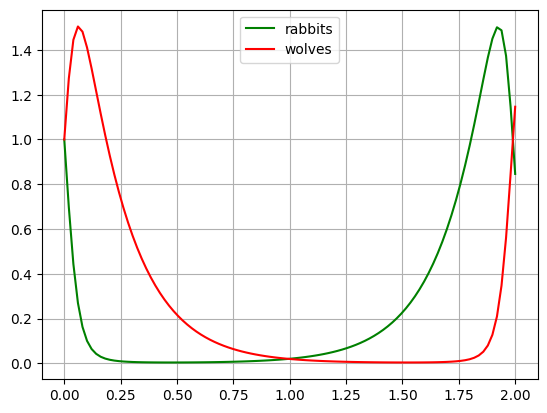

In [8]:
# We can plot at different rates:
result_2 = odeint(lodka_volterra, [1, 1], space, args = (5, 20, 5))

# This is an array of arrays of length 2.
# We need to get just the first element for every sub-array to get the number of rabbits
# and the second element to get the number of wolves. It can be done easily through 
# numpy magic:
pl.plot(space, result_2[:,0], "g", label = "rabbits") # [:,0] > every row, first (0) column
pl.plot(space, result_2[:,1], "r", label = "wolves")
pl.legend()
pl.grid()